# Creating a wordcloud

In [2]:
# installation of wordcloud
# pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
# import data
df_features = pd.read_csv("../data/df_features.csv")

In [9]:
# check out the data
df_features.head()

,movieId,tmdbId,actors,keywords,crew_jobs,genres,overview,release_date,tagline,title,imdbId,stemmed_overview
0,1,862,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,jealousy toy boy friendship friends rivalry bo...,"['Director', 'Screenplay', 'Screenplay', 'Scre...",Animation Comedy Family,"['Led', 'by', 'Woody,', ""Andy's"", 'toys', 'liv...",1995.0,,Toy Story,114709,"led by woody, andi toy live happili in his roo..."
1,2,8844,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,board game disappearance based on children's b...,"['Executive Producer', 'Screenplay', 'Original...",Adventure Fantasy Family,"['When', 'siblings', 'Judy', 'and', 'Peter', '...",1995.0,Roll the dice and unleash the excitement!,Jumanji,113497,when sibl judi and peter discov an enchant boa...
2,3,15602,Walter Matthau Jack Lemmon Ann-Margret Sophia ...,fishing best friend duringcreditsstinger old men,"['Director', 'Characters', 'Writer', 'Sound Re...",Romance Comedy,"['A', 'family', 'wedding', 'reignites', 'the',...",1995.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,113228,a famili wed reignit the ancient feud between ...
3,4,31357,Whitney Houston Angela Bassett Loretta Devine ...,based on novel interracial relationship single...,"['Director', 'Screenplay', 'Producer', 'Produc...",Comedy Drama Romance,"['Cheated', 'on,', 'mistreated', 'and', 'stepp...",1995.0,Friends are the people who let you be yourself...,Waiting to Exhale,114885,"cheat on, mistreat and step on, the women are ..."
4,5,11862,Steve Martin Diane Keaton Martin Short Kimberl...,baby midlife crisis confidence aging daughter ...,"['Original Music Composer', 'Director of Photo...",Comedy,"['Just', 'when', 'George', 'Banks', 'has', 're...",1995.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,113041,just when georg bank has recov from his daught...


## Short cleaning of keywords

In [32]:
df_features['keywords'].filter(regex='^nan')

Series([], Name: keywords, dtype: object)

In [19]:
df_features['keywords'] = df_features['keywords'].dropna()

## Pre-processing of text

In [20]:
df_features['title'] = df_features['title'].astype('str')
df_features['overview'] = df_features['overview'].astype('str')
df_features['keywords'] = df_features['keywords'].astype('str')

In [21]:
title_corpus = ' '.join(df_features['title'])
overview_corpus = ' '.join(df_features['overview'])
keyword_corpus = ' '.join(df_features['keywords'])

In [35]:
keyword_corpus.find("nan")
keyword_corpus = keyword_corpus.replace("nan", "")
keyword_corpus = keyword_corpus.replace("based", "")

In [37]:
keyword_corpus = keyword_corpus.replace("based", "")

# Wordcloud of the Title

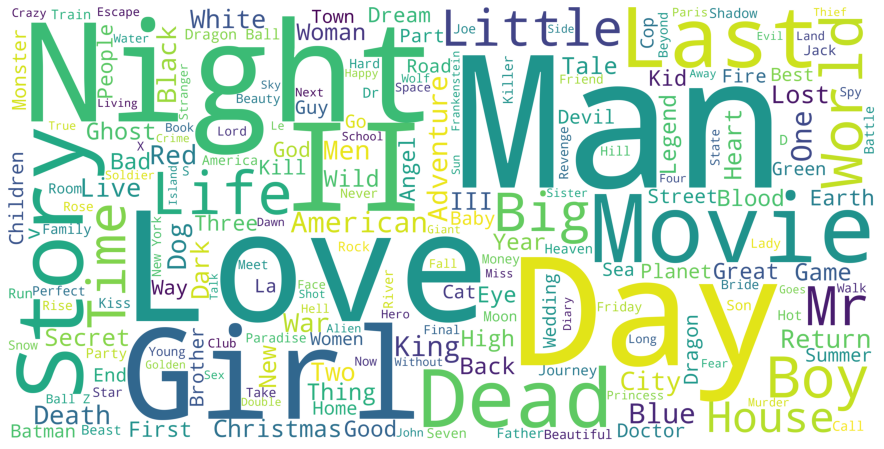

In [25]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()



# Wordcloud of the overview

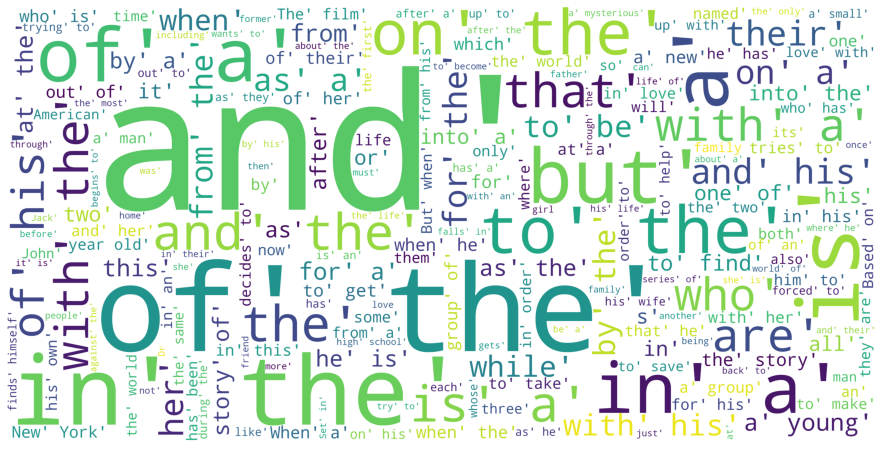

In [26]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

# Wordcloud of Keywords

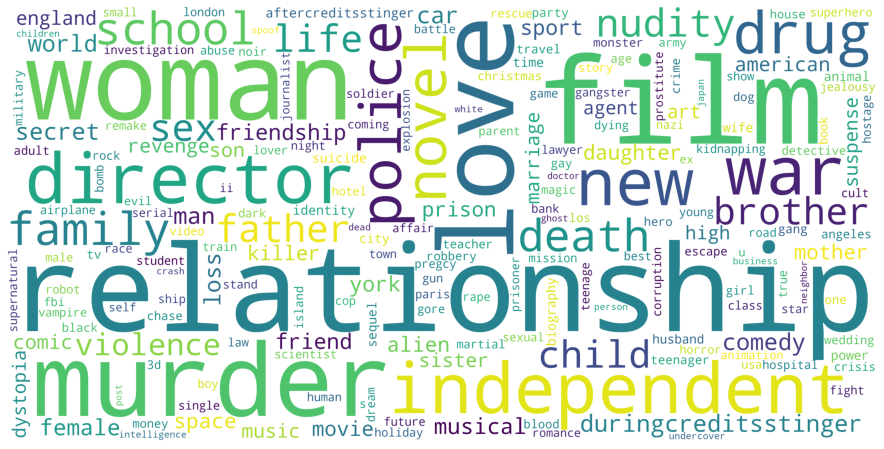

In [38]:
keyword_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, collocations=False).generate(keyword_corpus)
plt.figure(figsize=(16,8))
plt.imshow(keyword_wordcloud)
plt.axis('off')
plt.show()


# Wordcloud of Genres

In [23]:
df_features['genres'] = df_features['genres'].astype('str')
genres_corpus = ' '.join(df_features['genres'])

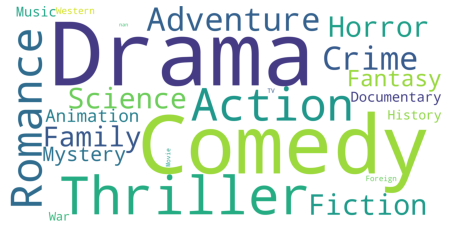

In [29]:
genres_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, collocations=False).generate(genres_corpus)
plt.figure(figsize=(8,4))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.show()